# Kernel Trick

Define a kernel function $K$ that computes the dot product or similarity measure between pairs of input vectors $x_i$​ and $x_j$​. The dot product between the mapped vectors $ϕ(x_i)$ and $ϕ(x_j​)$ in the higher-dimensional space is represented by $K(x_i,x_j)$.

The benefits of the kernel trick include:

- Efficiency: By avoiding the explicit computation of mapped vectors, the kernel trick can be more computationally efficient, especially in cases where the transformed space is high-dimensional.

- Flexibility: Enables algorithms to capture complex patterns and non-linear relationships in the data, providing greater flexibility in handling diverse datasets.

- Simplicity: Simplifies the implementation of algorithms by allowing them to work in the original feature space, while still leveraging the advantages of higher-dimensional representations.

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Generate data points
x = np.linspace(-3, 3, 1000)

### Polynomial Kernel

$$K(x, y) = (\langle x, y \rangle + c)^d \$$

where:
- $( \langle x, y \rangle)$ denotes the dot product of vectors $x$ and $y$,
- $c$ is a constant term,
- $d$ is the degree of the polynomial.


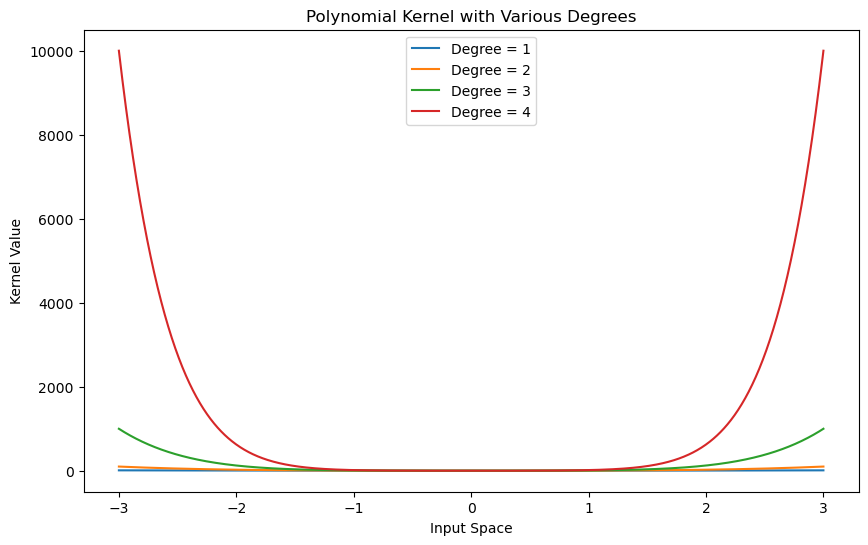

In [3]:
# Define the polynomial kernel function
def polynomial_kernel(x, y, degree=2):
    return (x * y + 1) ** degree

# Plot the polynomial kernel for various degrees
degrees = [1,2,3,4]

plt.figure(figsize=(10, 6))
for degree in degrees:
    y = np.array([polynomial_kernel(xi, xi, degree) for xi in x])
    plt.plot(x, y, label=f'Degree = {degree}')

plt.title('Polynomial Kernel with Various Degrees')
plt.xlabel('Input Space')
plt.ylabel('Kernel Value')
plt.legend()
plt.show()

### RBF (Gaussian) Kernel

$$\ K(\mathbf{x}, \mathbf{y}) = \exp\left(-\frac{\||\mathbf{x} - \mathbf{y}\||^2}{2\sigma^2}\right) \$$

Where:
- $K(\mathbf{x}, \mathbf{y})$ is the kernel function value between two input vectors ${x}$ and ${y}$.
- $||\mathbf{x} - \mathbf{y}||$ represents the Euclidean distance between the input vectors.
- $\sigma\$ is a positive parameter known as the bandwidth or scale parameter, determining the width of the Gaussian distribution.


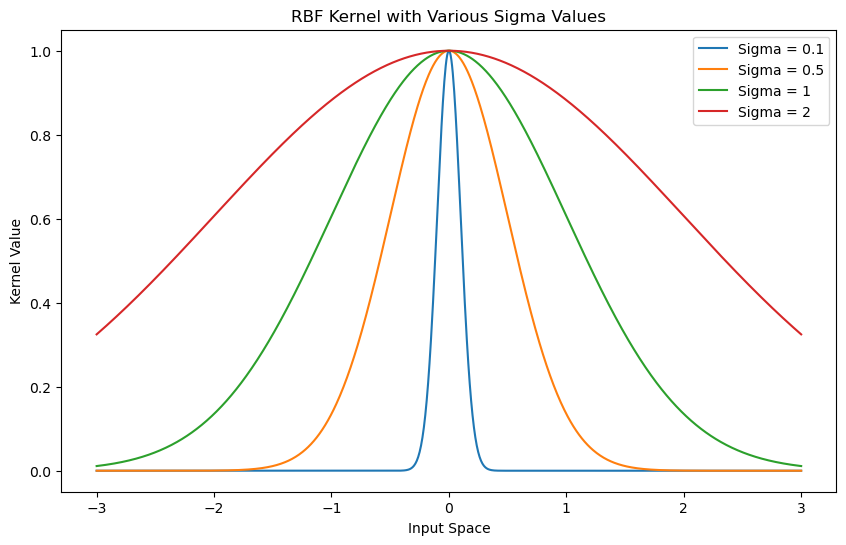

In [4]:
# Define the RBF kernel function
def rbf_kernel(x, y, sigma=1.0):
    return np.exp(-np.square(np.linalg.norm(x - y)) / (2 * sigma**2))

# Plot the RBF kernel for various values of sigma
sigmas = [0.1, 0.5, 1, 2]

plt.figure(figsize=(10, 6))
for sigma in sigmas:
    y = np.array([rbf_kernel(xi, 0, sigma) for xi in x])
    plt.plot(x, y, label=f'Sigma = {sigma}')

plt.title('RBF Kernel with Various Sigma Values')
plt.xlabel('Input Space')
plt.ylabel('Kernel Value')
plt.legend()
plt.show()

### Kernel Trick Performance

We will generate a synthetic dataset with 20 features and measure the time it takes to train a linear SVM and an SVM with an RBF kernel on the dataset. 

Observe the computational benefits. The RBF kernel, employing the kernel trick, can handle non-linear relationships more efficiently than explicitly mapping the data into a higher-dimensional space.

In [5]:
# Create a synthetic dataset with a non-linear relationship
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear SVM without Kernel Trick
start_time = time.time()
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_time = time.time() - start_time

# SVM with RBF Kernel (Kernel Trick)
start_time = time.time()
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_time = time.time() - start_time

print("Time taken for Linear SVM:", linear_time)
print("Time taken for RBF Kernel SVM:", rbf_time)

Time taken for Linear SVM: 4.911849021911621
Time taken for RBF Kernel SVM: 0.35906982421875


## Kernel Matrix Size

We'll generate random data points and calculate the size of the corresponding kernel matrix for different numbers of data points. We'll then visualize the quadratic growth using a plot.

It can be observed that the size of the kernel matrix grows quadratically with the number of data points. 

In [6]:
def compute_kernel_matrix(data_points, kernel_function):
    num_data_points = len(data_points)
    kernel_matrix = np.zeros((num_data_points, num_data_points))
    
    for i in range(num_data_points):
        for j in range(num_data_points):
            kernel_matrix[i, j] = kernel_function(data_points[i], data_points[j])

    return kernel_matrix

def compute_kernel_matrix_size(num_data_points):
    # Generate random data points
    data_points = np.random.rand(num_data_points, 2)

    # Calculate the size of the kernel matrix
    kernel_matrix = np.zeros((num_data_points, num_data_points))
    for i in range(num_data_points):
        for j in range(num_data_points):
            kernel_matrix[i, j] = rbf_kernel(data_points[i], data_points[j])

    return kernel_matrix.nbytes  # Size of the kernel matrix in bytes


In [7]:
# Example usage
data_points = np.array([[1, 2], [3, 4], [5, 6]])
rbf_matrix = compute_kernel_matrix(data_points, rbf_kernel)
print("RBF Kernel Matrix:")
print(rbf_matrix)

RBF Kernel Matrix:
[[1.00000000e+00 1.83156389e-02 1.12535175e-07]
 [1.83156389e-02 1.00000000e+00 1.83156389e-02]
 [1.12535175e-07 1.83156389e-02 1.00000000e+00]]


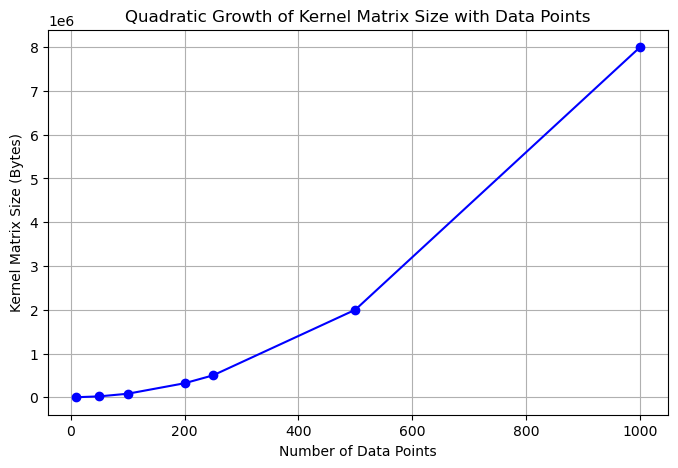

In [8]:
# Vary the number of data points
num_data_points_list = [10, 50, 100, 200, 250,500,1000]

# Calculate and print the size of the kernel matrix for each case
# Calculate the size of the kernel matrix for each case
kernel_matrix_sizes = [compute_kernel_matrix_size(num_data_points) for num_data_points in num_data_points_list]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(num_data_points_list, kernel_matrix_sizes, marker='o', linestyle='-', color='b')
plt.title('Quadratic Growth of Kernel Matrix Size with Data Points')
plt.xlabel('Number of Data Points')
plt.ylabel('Kernel Matrix Size (Bytes)')
plt.grid(True)
plt.show()
